# EDA

In [1]:
import pandas as pd

df_mistral = pd.read_csv('/kaggle/input/rusimulbench-2/evaluated_responses_Mistral-Nemo_answers.csv')
df_qwen =  pd.read_csv('/kaggle/input/rusimulbench-2/evaluated_responses_Qwen2_5_7B_answers.csv')
df_llama3 =  pd.read_csv('/kaggle/input/rusimulbench-2/evaluated_responses_saiga_llama3_8b_answers.csv')
df_tinyllama =  pd.read_csv('/kaggle/input/rusimulbench-2/evaluated_responses_TinyLlama_1_1B_answers.csv')
df_vikhr =  pd.read_csv('/kaggle/input/rusimulbench-2/evaluated_responses_Vikhr_Nemo_12B_answers.csv')

In [2]:
df_mistral.columns

Index(['act', 'rus_prompt', 'Mistral-Nemo_answers', 'gemini_eval_answer',
       'Креативность', 'Разнообразие', 'Релевантность', 'Общая оценка',
       'Среднее'],
      dtype='object')

In [3]:
df_qwen.head()

,act,rus_prompt,TinyLlama-1.1B_answers,Qwen2.5-7B_answers,gemini_eval_answer,Креативность,Разнообразие,Релевантность,Общая оценка,Среднее
0,Password Generator_1,"Я хочу, чтобы вы выступили в роли генератора п...","Я хочу, чтобы вы выступили в роли генератора п...","Я хочу, чтобы вы выступили в роли генератора п...",Оценка ответа:\n\n**Общая оценка: 3/10**\n\n**...,2.0,4.0,7.0,3.0,4.333333
1,Password Generator_2,Мне нужен безопасный пароль. Используйте парам...,Мне нужен безопасный пароль. Используйте парам...,Мне нужен безопасный пароль. Используйте парам...,Общая оценка: 2/10\n\n**1. Креативность (1/10)...,1.0,2.0,0.0,2.0,1.500000
2,Password Generator_3,"Пожалуйста, создайте пароль на основе следующи...","Пожалуйста, создайте пароль на основе следующи...","Пожалуйста, создайте пароль на основе следующи...",## Оценка ответа:\n\n**Общая оценка:** 5/10\n\...,4.0,6.0,7.0,5.0,5.666667
3,Password Generator_4,"Сгенерируйте сложный пароль, учитывая параметр...","Сгенерируйте сложный пароль, учитывая параметр...","Сгенерируйте сложный пароль, учитывая параметр...",Оценка ответа:\n\n**1. Креативность (0/10):** ...,0.0,1.0,2.0,1.0,1.500000
4,Journalist_1,"Я хочу, чтобы вы выступили в роли журналиста и...","Я хочу, чтобы вы выступили в роли журналиста и...","Я хочу, чтобы вы выступили в роли журналиста и...",Оценка ответа:\n\n**1. Креативность (5/10):** ...,5.0,6.0,8.0,6.3,6.333333


# 1. Overall average scores

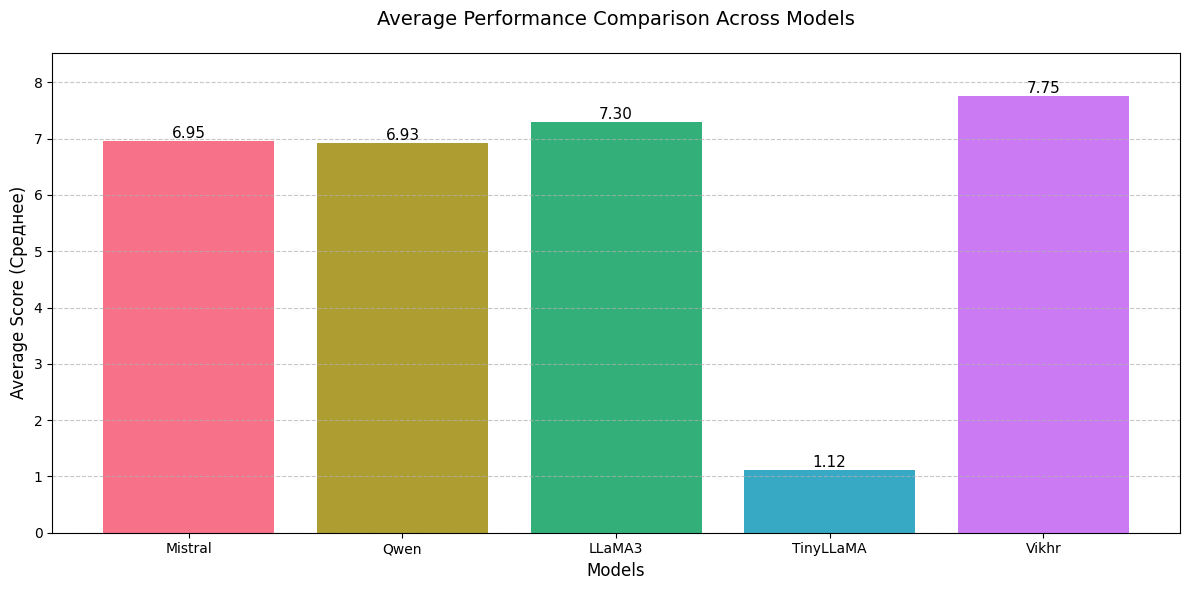

Релевантность 
Numeric values:
Mistral: 6.950
Qwen: 6.930
LLaMA3: 7.300
TinyLLaMA: 1.120
Vikhr: 7.750


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
mean_scores = {
    'Mistral': df_mistral['Релевантность'].mean(),
    'Qwen': df_qwen['Релевантность'].mean(),
    'LLaMA3': df_llama3['Релевантность'].mean(),
    'TinyLLaMA': df_tinyllama['Релевантность'].mean(),
    'Vikhr': df_vikhr['Релевантность'].mean()
}

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot with enhanced style
colors = sns.color_palette("husl", len(mean_scores))
bars = plt.bar(mean_scores.keys(), mean_scores.values(), color=colors)

# Customize the plot
plt.title('Average Performance Comparison Across Models', fontsize=14, pad=20)
plt.ylabel('Average Score (Среднее)', fontsize=12)
plt.xlabel('Models', fontsize=12)

plt.ylim(0, max(mean_scores.values()) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom',
             fontsize=11)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()

plt.show()

# Print actual values
print("Релевантность \nNumeric values:")
for model, score in mean_scores.items():
    print(f"{model}: {score:.3f}")

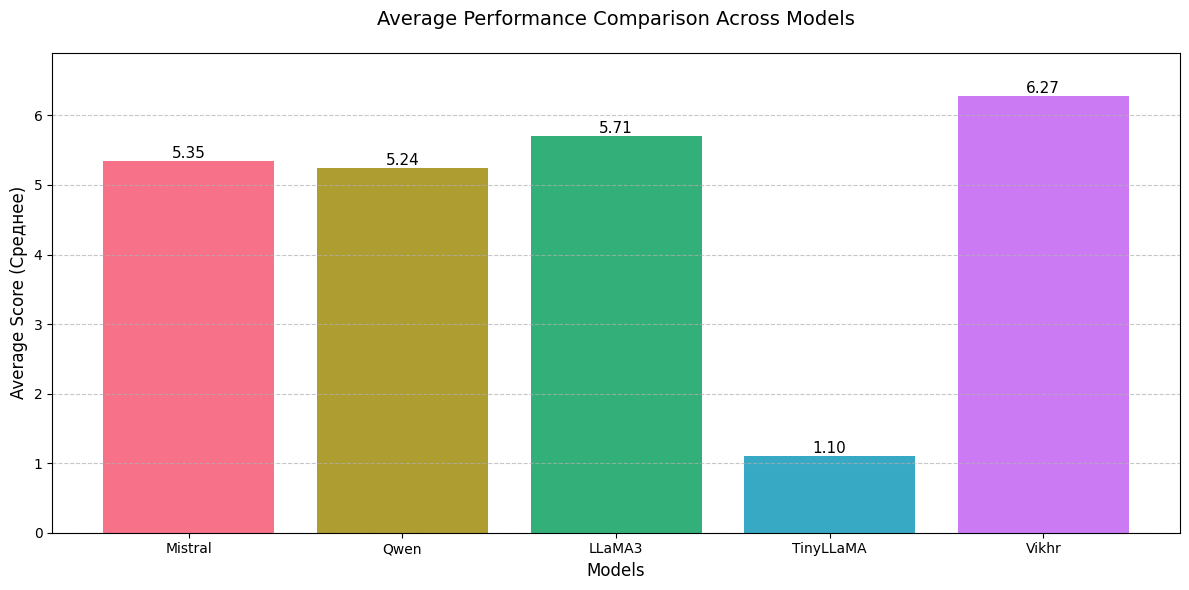


Numeric values:
Mistral: 5.348
Qwen: 5.240
LLaMA3: 5.708
TinyLLaMA: 1.098
Vikhr: 6.273


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
mean_scores = {
    'Mistral': df_mistral['Среднее'].mean(),
    'Qwen': df_qwen['Среднее'].mean(),
    'LLaMA3': df_llama3['Среднее'].mean(),
    'TinyLLaMA': df_tinyllama['Среднее'].mean(),
    'Vikhr': df_vikhr['Среднее'].mean()
}

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot with enhanced style
colors = sns.color_palette("husl", len(mean_scores))
bars = plt.bar(mean_scores.keys(), mean_scores.values(), color=colors)

# Customize the plot
plt.title('Average Performance Comparison Across Models', fontsize=14, pad=20)
plt.ylabel('Average Score (Среднее)', fontsize=12)
plt.xlabel('Models', fontsize=12)

plt.ylim(0, max(mean_scores.values()) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom',
             fontsize=11)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()

plt.show()

# Print actual values
print("\nNumeric values:")
for model, score in mean_scores.items():
    print(f"{model}: {score:.3f}")

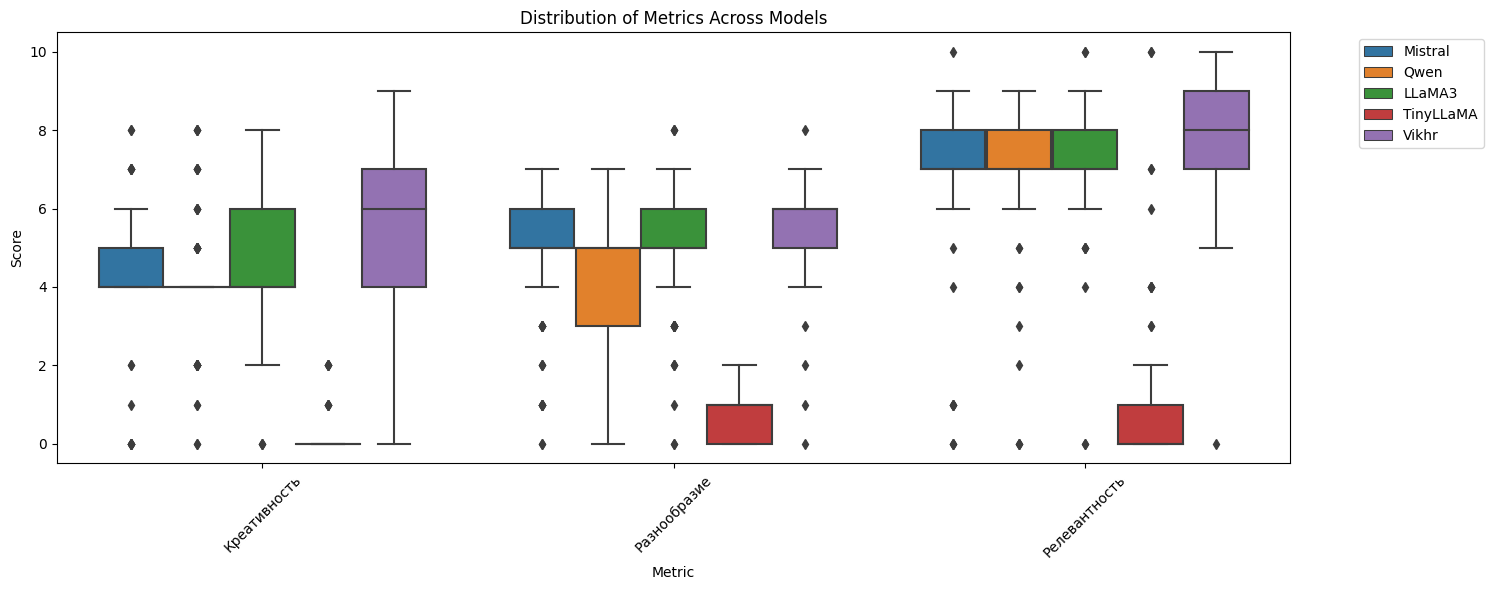

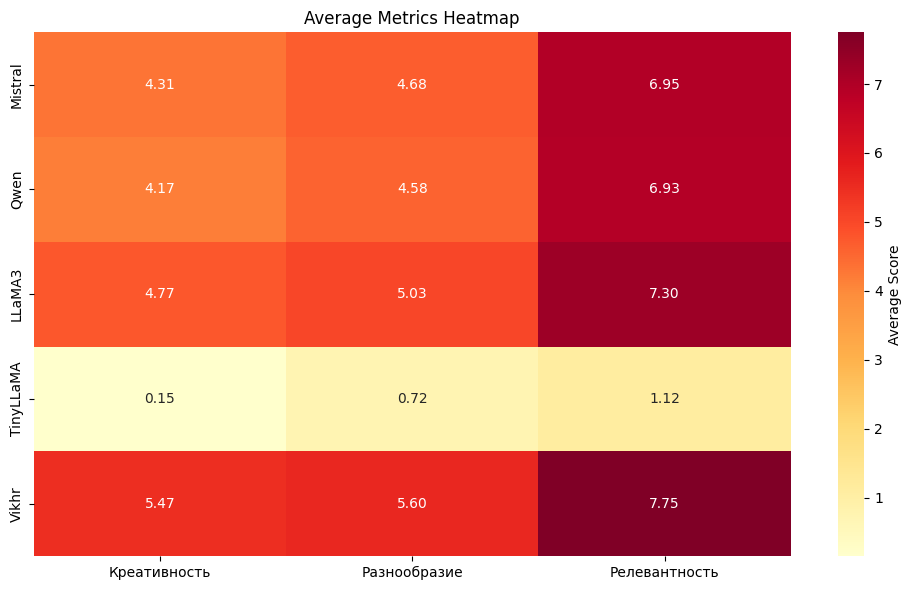

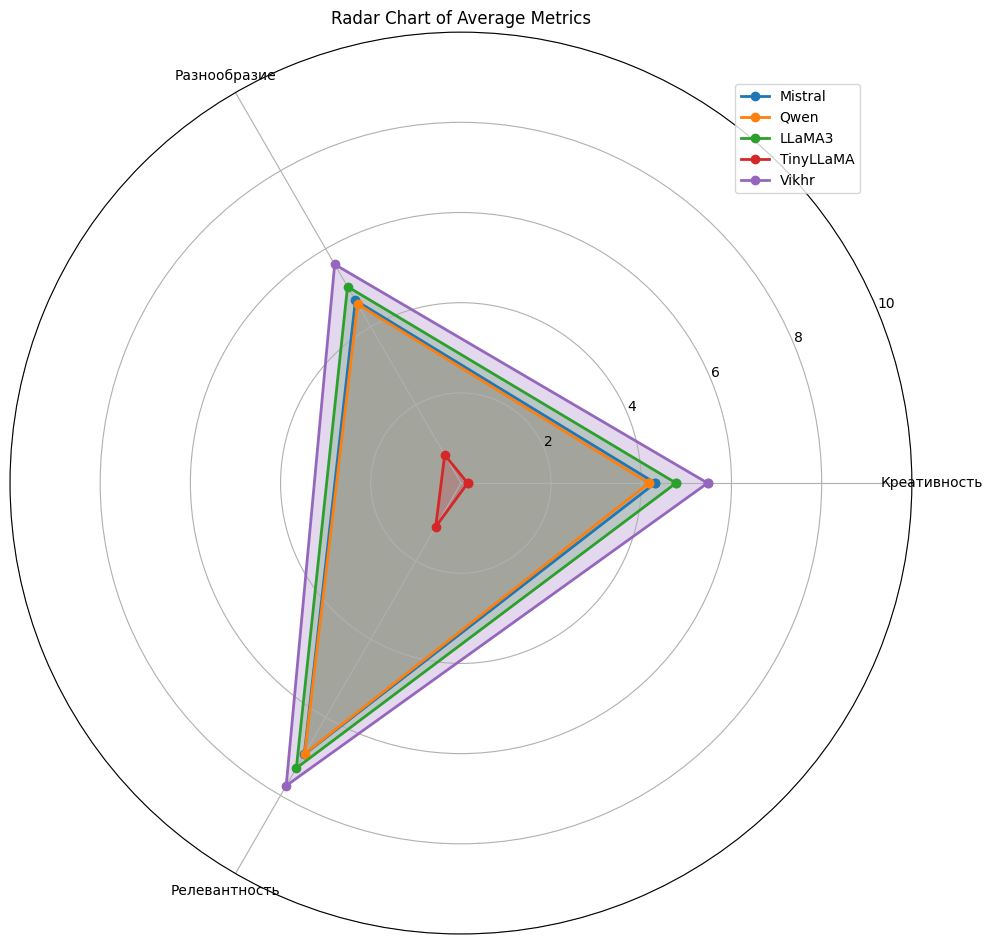

In [6]:
# Create detailed metrics comparison
metrics = ['Креативность', 'Разнообразие', 'Релевантность']
model_dfs = {
    'Mistral': df_mistral,
    'Qwen': df_qwen,
    'LLaMA3': df_llama3,
    'TinyLLaMA': df_tinyllama,
    'Vikhr': df_vikhr
}

# Calculate statistics for each metric and model
stats_data = []
for model_name, df in model_dfs.items():
    for metric in metrics:
        stats_data.append({
            'Model': model_name,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Max': df[metric].max(),
            'Min': df[metric].min(),
            'Std': df[metric].std()
        })

# Create box plots for detailed distribution
plt.figure(figsize=(15, 6))
data_melted = pd.concat([
    pd.melt(df[metrics], value_vars=metrics).assign(Model=name)
    for name, df in model_dfs.items()
])

sns.boxplot(x='variable', y='value', hue='Model', data=data_melted)
plt.title('Distribution of Metrics Across Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create heatmap of average metrics
avg_metrics = pd.DataFrame([
    [df[metric].mean() for metric in metrics]
    for df in model_dfs.values()
], columns=metrics, index=model_dfs.keys())

plt.figure(figsize=(10, 6))
sns.heatmap(avg_metrics, annot=True, cmap='YlOrRd', fmt='.2f', 
            cbar_kws={'label': 'Average Score'})
plt.title('Average Metrics Heatmap')
plt.tight_layout()
plt.show()

# Radar chart for comparing all metrics
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
for model_name, df in model_dfs.items():
    values = [df[metric].mean() for metric in metrics]
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 10)
plt.legend(bbox_to_anchor=(0.95, 0.95))
plt.title('Radar Chart of Average Metrics')
plt.tight_layout()
plt.show()

In [7]:
df_mistral['act'].head(20)

0          Password Generator_1
1          Password Generator_2
2          Password Generator_3
3          Password Generator_4
4                  Journalist_1
5                  Journalist_2
6                  Journalist_3
7                  Journalist_4
8                Essay Writer_1
9                Essay Writer_2
10               Essay Writer_3
11               Essay Writer_4
12    Social Media Influencer_1
13    Social Media Influencer_2
14    Social Media Influencer_3
15    Social Media Influencer_4
16                     Socrat_1
17                     Socrat_2
18                     Socrat_3
19                     Socrat_4
Name: act, dtype: object

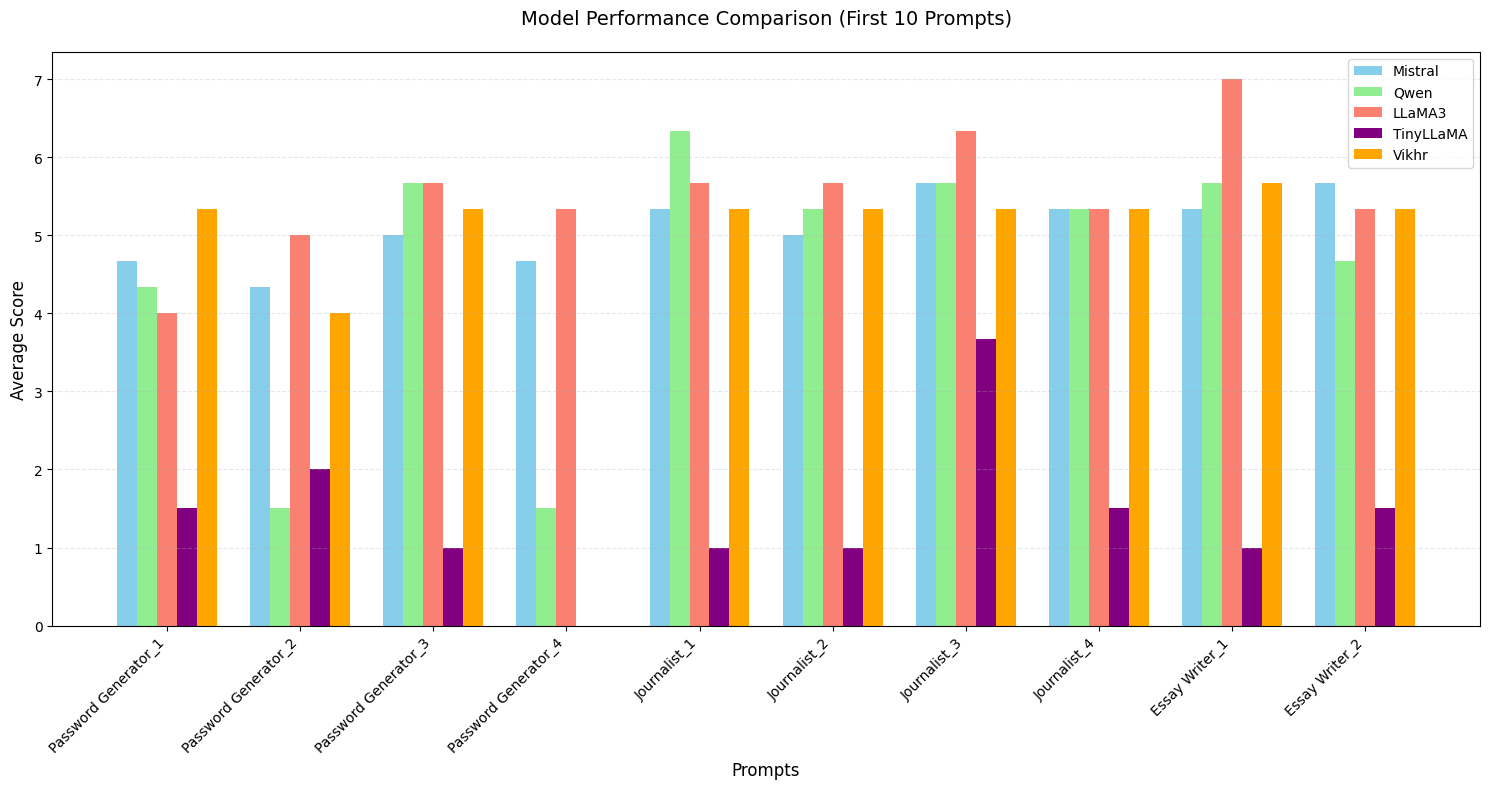

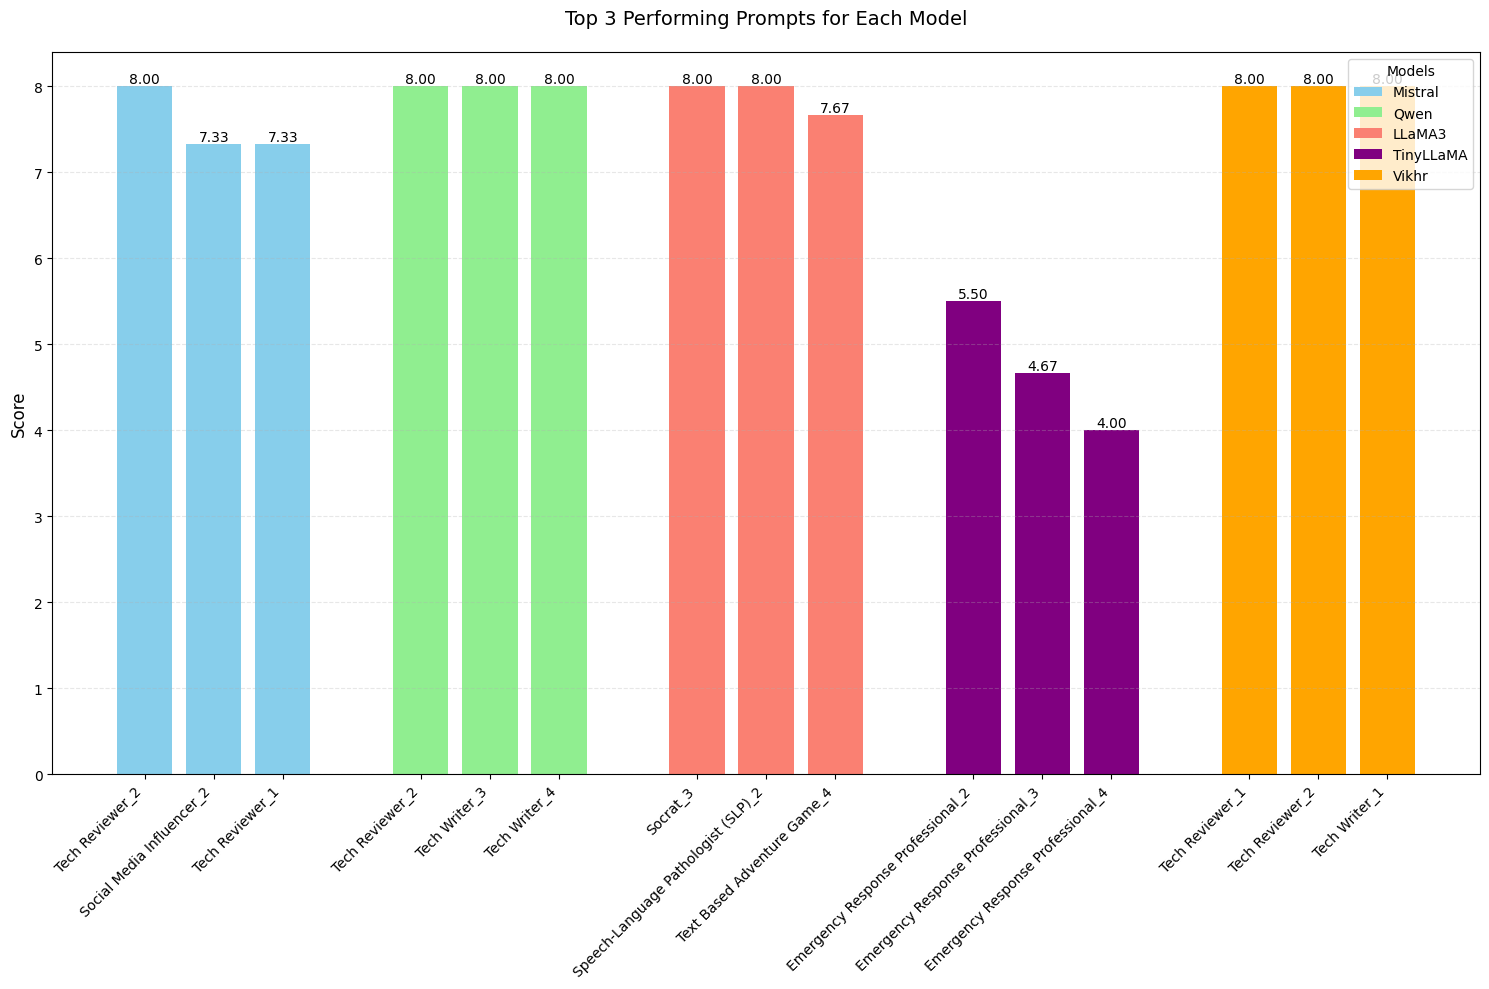


Top 3 prompts for each model:

Mistral:
                   Prompt  Mistral
          Tech Reviewer_2 8.000000
Social Media Influencer_2 7.333333
          Tech Reviewer_1 7.333333

Qwen:
         Prompt  Qwen
Tech Reviewer_2   8.0
  Tech Writer_3   8.0
  Tech Writer_4   8.0

LLaMA3:
                             Prompt   LLaMA3
                           Socrat_3 8.000000
Speech-Language Pathologist (SLP)_2 8.000000
        Text Based Adventure Game_4 7.666667

TinyLLaMA:
                           Prompt  TinyLLaMA
Emergency Response Professional_2   5.500000
Emergency Response Professional_3   4.666667
Emergency Response Professional_4   4.000000

Vikhr:
         Prompt  Vikhr
Tech Reviewer_1    8.0
Tech Reviewer_2    8.0
  Tech Writer_1    8.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create DataFrame for first 10 prompts
comparison_df = pd.DataFrame({
    'Prompt': df_mistral['act'][:10],
    'Mistral': df_mistral['Среднее'][:10],
    'Qwen': df_qwen['Среднее'][:10],
    'LLaMA3': df_llama3['Среднее'][:10],
    'TinyLLaMA': df_tinyllama['Среднее'][:10],
    'Vikhr': df_vikhr['Среднее'][:10]
})

# First plot: First 10 prompts comparison
plt.figure(figsize=(15, 8))

x = np.arange(len(comparison_df['Prompt']))
width = 0.15

plt.bar(x - width*2, comparison_df['Mistral'], width, label='Mistral', color='skyblue')
plt.bar(x - width, comparison_df['Qwen'], width, label='Qwen', color='lightgreen')
plt.bar(x, comparison_df['LLaMA3'], width, label='LLaMA3', color='salmon')
plt.bar(x + width, comparison_df['TinyLLaMA'], width, label='TinyLLaMA', color='purple')
plt.bar(x + width*2, comparison_df['Vikhr'], width, label='Vikhr', color='orange')

plt.xlabel('Prompts', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('Model Performance Comparison (First 10 Prompts)', fontsize=14, pad=20)
plt.xticks(x, comparison_df['Prompt'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Create full DataFrame for top 3 analysis
full_comparison_df = pd.DataFrame({
    'Prompt': df_mistral['act'],
    'Mistral': df_mistral['Среднее'],
    'Qwen': df_qwen['Среднее'],
    'LLaMA3': df_llama3['Среднее'],
    'TinyLLaMA': df_tinyllama['Среднее'],
    'Vikhr': df_vikhr['Среднее']
})

# Create visualization for top 3 performers
plt.figure(figsize=(15, 10))

# Initialize position counters
pos = 0
bar_positions = []
bar_labels = []
bar_heights = []
bar_colors = []
model_colors = {'Mistral': 'skyblue', 'Qwen': 'lightgreen', 'LLaMA3': 'salmon', 
                'TinyLLaMA': 'purple', 'Vikhr': 'orange'}

for model in ['Mistral', 'Qwen', 'LLaMA3', 'TinyLLaMA', 'Vikhr']:
    top_3 = full_comparison_df.nlargest(3, model)[['Prompt', model]]
    
    # Add bars for this model
    for idx, row in top_3.iterrows():
        bar_positions.append(pos)
        bar_labels.append(f"{row['Prompt']}")
        bar_heights.append(row[model])
        bar_colors.append(model_colors[model])
        pos += 1
    pos += 1  # Add space between models

# Create the bars
bars = plt.bar(bar_positions, bar_heights, color=bar_colors)

# Customize the plot
plt.xticks(bar_positions, bar_labels, rotation=45, ha='right')
plt.ylabel('Score', fontsize=12)
plt.title('Top 3 Performing Prompts for Each Model', fontsize=14, pad=20)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Create custom legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model) 
                  for model, color in model_colors.items()]
plt.legend(handles=legend_elements, title='Models')

plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the numerical values
print("\nTop 3 prompts for each model:")
for model in ['Mistral', 'Qwen', 'LLaMA3', 'TinyLLaMA', 'Vikhr']:
    print(f"\n{model}:")
    top_3 = full_comparison_df.nlargest(3, model)[['Prompt', model]]
    print(top_3.to_string(index=False))